In [62]:
import graphviz

In [27]:
from graphviz import Digraph
from copy import deepcopy
def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'TB'},node_attr={'shape': 'plaintext'}) # LR = left to right, TB = top to bottom
  
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = f"{n.label}",shape='circle')
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n2)), str(id(n1)))
        
        
    
    return dot

In [74]:
from dataclasses import field
from tictactoe import Board

class Node:
    def __init__(self, key, board: Board | None = None, children=None):
        
        self.label = key
        self.board = board
        
        self._prev = [] if children is None else children
        
    def add_prev(self, child):
        self._prev.append(child)
    
    def generate_dfs(self, rem_depth):
        if rem_depth == 0:
            return
        if self.board.result() is not None: #game ended
            return
        for move in self.board.possible_moves():
            c = deepcopy
            child_board = c(self.board)
            child_board.push(move)
            child_node = Node(key=str(child_board),board=child_board)
            self.add_prev(child_node)
            child_node.generate_dfs(rem_depth-1)
    

In [11]:
board = Board()

In [8]:
%%time
board = Board()
board.result()

CPU times: user 160 µs, sys: 43 µs, total: 203 µs
Wall time: 182 µs


In [169]:
dot1 = draw_dot(node)

In [170]:
dot1.render(directory=".")

'Digraph.gv.svg'

In [52]:
node5 = Node("Y")
node0 = Node("X", children=[node5])
node1 = Node("A",children=[node0])
node2 = Node("B")
node3 = Node("C")
node4 = Node("D",children=[node1,node2,node3])

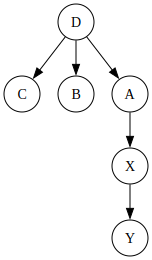

In [53]:
draw_dot(node4)

In [54]:
from tictactoe import Board

In [55]:
board = Board()


In [56]:
board

   |   |   
-----------
   |   |   
-----------
   |   |   

In [57]:
board2 = Board()
board2.push((0,0))
board3 = Board()
board3.push((1,0))
board4 = Board()
board4.push((2,0))


node1 = Node(str(board2))
node2 = Node(str(board3))
node3 = Node(str(board4))
node0 = Node(str(board), children=[node1,node2,node3])

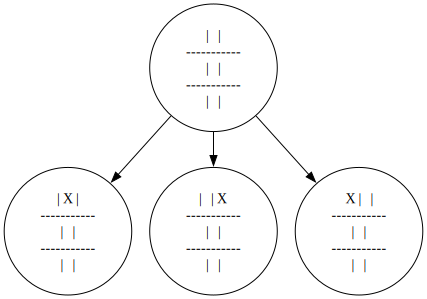

In [58]:
draw_dot(node0)

In [59]:
board5 = deepcopy(board2)
board5.push((1,0))
node5 = Node(str(board5))
node1.add_prev(node5)

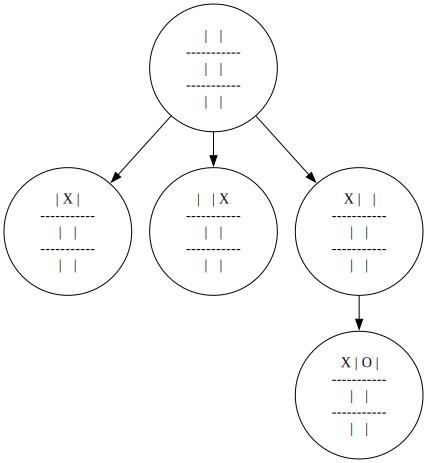

In [60]:
draw_dot(node0)

In [75]:
board = Board()
node0 = Node(key=str(board),board=board)

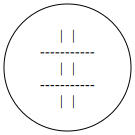

In [76]:
draw_dot(node0)

In [77]:
node0.generate_dfs(1)

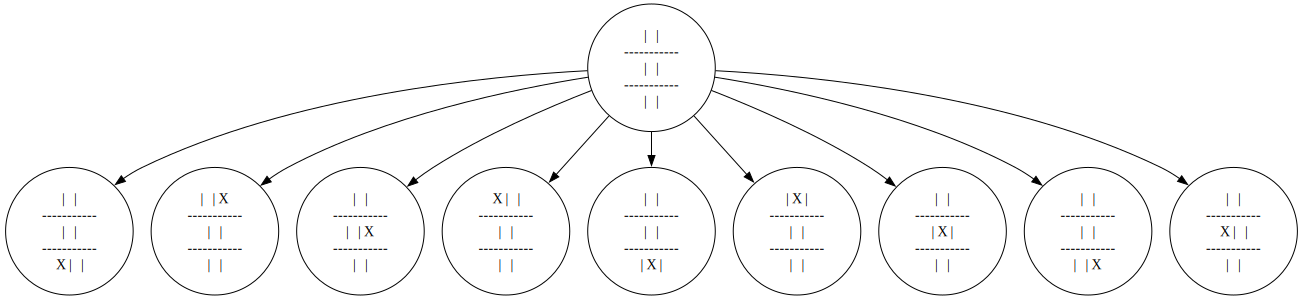

In [78]:
draw_dot(node0)

In [79]:
len(node0._prev)

9

CPU times: user 20.7 ms, sys: 1.48 ms, total: 22.2 ms
Wall time: 25.1 ms


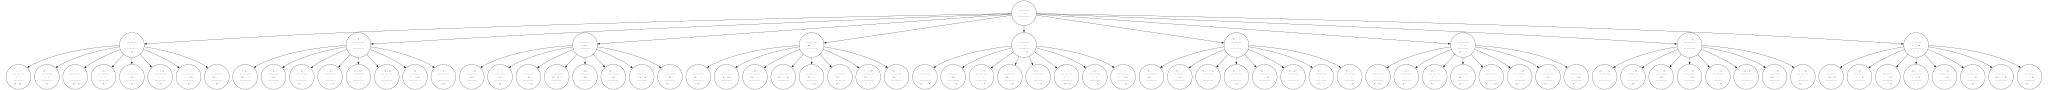

In [85]:
%%time
board = Board()
node0 = Node(key=str(board),board=board)
node0.generate_dfs(2)

In [92]:
%%time
board = Board()
node0 = Node(key=str(board),board=board)
node0.generate_dfs(3)

CPU times: user 83.3 ms, sys: 7.21 ms, total: 90.5 ms
Wall time: 86 ms


In [94]:
draw_dot(node0)